In [106]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read CSVs
I'm combining multiple CSVs that scraped Bayut website at different times

In [107]:
csvs= glob.glob("*.csv")
csvs.remove('properties_dubai_furnished=all_simple.csv')
csvs.remove('properties_cleaned_engineered.csv')
csvs

['properties_dubai_furnished=all_2022-11-19 06:15:57.csv',
 'properties_dubai_furnished=all_2022-11-19 07:19:22.csv',
 'properties_dubai_furnished=all_2022-11-19 02:22:30.csv',
 'properties_dubai_furnished=all_2022-11-19 05:36:05.csv',
 'properties_dubai_furnished=all_2022-11-19 06:17:58.csv']

In [108]:
dfs = [pd.read_csv(i) for i in csvs]
for i,df in enumerate(dfs):
    print(f"Dataframe {i+1} has {len(df)} rows.\n")

Dataframe 1 has 38215 rows.

Dataframe 2 has 38359 rows.

Dataframe 3 has 38325 rows.

Dataframe 4 has 38335 rows.

Dataframe 5 has 38335 rows.



#### Combine all dataframes into one, and drop any duplicates

In [109]:
df = pd.concat(dfs)
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,883 sqft,"77,990","Loreto 3B, Loreto B, Loreto, DAMAC Hills, Dubai",Apartment,"Brand New Furniture Vacant | 8,000AED / Month","Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
1,2,3,"8,425 sqft","200,000","Nakheel Villas, Jumeirah Village Circle (JVC),...",Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
2,5,4,"6,002 sqft","600,000","Flame Tree Ridge, Jumeirah Golf Estates, Dubai",Villa,Inverness | Earth View | Wrapped Kitchen,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
3,2,2,"1,200 sqft","60,000","Rose 1 Building, Al Mankhool, Bur Dubai, Dubai",Apartment,Family Building Well Maintained 2BHK Apartment...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
4,7,8,"8,000 sqft","950,000","Hattan 2, Hattan, The Lakes, Dubai",Villa,7 Bedrooms | Opposite The Park | 3 Floors,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
...,...,...,...,...,...,...,...,...,...
38330,1,1,784 sqft,"39,999","Muhaisnah 4, Muhaisnah, Dubai",Apartment,Ready To Move | Pay Monthly | 24x7 Call Centre,wasl ivoryDED# 619683,-1
38331,5,6,"7,000 sqft","220,000","Jumeirah 3, Jumeirah, Dubai",Villa,Beautifully maintained: 5 b/r semi-independent...,wasl ivoryDED# 619683,-1
38332,5,6,"15,000 sqft","220,000","Al Barsha 2, Al Barsha, Dubai",Villa,Private swimming pool and stunning landscaped ...,wasl ivoryDED# 619683,-1
38333,2,2,"1,100 sqft","68,000","Sheikh Hamdan Colony, Al Karama, Dubai",Apartment,Spacious 2 BHK for family in Al Karama,wasl ivoryDED# 619683,-1


In [110]:
df = df.drop_duplicates()
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,883 sqft,"77,990","Loreto 3B, Loreto B, Loreto, DAMAC Hills, Dubai",Apartment,"Brand New Furniture Vacant | 8,000AED / Month","Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
1,2,3,"8,425 sqft","200,000","Nakheel Villas, Jumeirah Village Circle (JVC),...",Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
2,5,4,"6,002 sqft","600,000","Flame Tree Ridge, Jumeirah Golf Estates, Dubai",Villa,Inverness | Earth View | Wrapped Kitchen,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
3,2,2,"1,200 sqft","60,000","Rose 1 Building, Al Mankhool, Bur Dubai, Dubai",Apartment,Family Building Well Maintained 2BHK Apartment...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
4,7,8,"8,000 sqft","950,000","Hattan 2, Hattan, The Lakes, Dubai",Villa,7 Bedrooms | Opposite The Park | 3 Floors,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
...,...,...,...,...,...,...,...,...,...
38203,4,4,"2,387 sqft","265,000","Maple At Dubai Hills Estate 2, Maple at Dubai ...",Villa,3M | CLOSE TO POOL | GREEN BELT | COMING UP SOON,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38204,1,1,800 sqft,"33,000","Al Warqaa, Dubai",Apartment,SPACIOUS 1BHK ONE MONTH FREE GYM POOL PARKING ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38205,4,5,"7,437 sqft","700,000","Golf Place I, Golf Place, Dubai Hills Estate, ...",Villa,Brand New 4 Bedroom Villa for Rent,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38206,1,1,450 sqft,"28,000","Hor Al Anz, Deira, Dubai",Apartment,1BEDROOM HALL FLAT W/AC FAMILY ONLY AVAILABLE ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1


#### Let's remove the rows without area and price

In [111]:
df = df.drop(index=df[df.area == '-1'].index)
df = df.drop(index=df[df.prices == '-1'].index)
print(len(df))

165289


In [112]:
df = df.drop(index=df[df.prices == '-1'].index)
print(len(df))

165289


In [113]:
df['bedrooms'].value_counts()

1         50502
2         48417
3         23832
Studio    19768
4          9895
5          9126
6          2242
7           733
8           388
10          118
9           114
12           58
21           24
11           23
16           11
14           10
18            8
17            6
13            6
15            4
20            4
Name: bedrooms, dtype: int64

In [114]:
df.locations = df.locations.apply(lambda x: x.split(',')[-2].strip())
df.bedrooms = df.bedrooms.apply(lambda x: '0' if x=='Studio' else x)
df.prices = df.prices.apply(lambda x: x.replace(',',''))
df.area = df.area.apply(lambda x: x.replace('sqft','').replace(',',''))

In [115]:
df.bedrooms = df.bedrooms.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.prices = df.prices.astype(float)
df.area = df.area.astype(float)

In [116]:
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,883.0,77990.0,DAMAC Hills,Apartment,"Brand New Furniture Vacant | 8,000AED / Month","Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
1,2,3,8425.0,200000.0,Jumeirah Village Circle (JVC),Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
2,5,4,6002.0,600000.0,Jumeirah Golf Estates,Villa,Inverness | Earth View | Wrapped Kitchen,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
3,2,2,1200.0,60000.0,Bur Dubai,Apartment,Family Building Well Maintained 2BHK Apartment...,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
4,7,8,8000.0,950000.0,The Lakes,Villa,7 Bedrooms | Opposite The Park | 3 Floors,"Exclusive with fam Properties, this stunning w...",FurnishedBalcony or TerraceElevators in Building
...,...,...,...,...,...,...,...,...,...
38203,4,4,2387.0,265000.0,Dubai Hills Estate,Villa,3M | CLOSE TO POOL | GREEN BELT | COMING UP SOON,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38204,1,1,800.0,33000.0,Al Warqaa,Apartment,SPACIOUS 1BHK ONE MONTH FREE GYM POOL PARKING ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38205,4,5,7437.0,700000.0,Dubai Hills Estate,Villa,Brand New 4 Bedroom Villa for Rent,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38206,1,1,450.0,28000.0,Deira,Apartment,1BEDROOM HALL FLAT W/AC FAMILY ONLY AVAILABLE ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1


In [117]:
list(df.locations.value_counts().keys())

['Jumeirah Village Circle (JVC)',
 'Downtown Dubai',
 'Bur Dubai',
 'Dubai Marina',
 'Business Bay',
 'Al Nahda (Dubai)',
 'Al Barsha',
 'International City',
 'Al Jaddaf',
 'Deira',
 'Arjan',
 'Dubai Silicon Oasis',
 'Palm Jumeirah',
 'Al Karama',
 'The Lagoons',
 'Al Warqaa',
 'Dubailand',
 'Jumeirah Beach Residence (JBR)',
 'Dubai Hills Estate',
 'Dubai South',
 'Jumeirah Lake Towers (JLT)',
 'DAMAC Hills 2 (Akoya by DAMAC)',
 'Dubai Sports City',
 'Mirdif',
 'DAMAC Hills',
 'Sheikh Zayed Road',
 'Al Qusais',
 'Barsha Heights (Tecom)',
 'Al Furjan',
 'Discovery Gardens',
 'Al Warsan',
 'Umm Suqeim',
 'Jumeirah',
 'Ras Al Khor',
 'Mohammed Bin Rashid City',
 'Al Quoz',
 'Arabian Ranches 2',
 'Dubai Harbour',
 'Town Square',
 'Dubai Investment Park (DIP)',
 'Nad Al Sheba',
 'Dubai Residence Complex',
 'Dubai Production City (IMPZ)',
 'Al Satwa',
 'Meydan City',
 'Muhaisnah',
 'Jumeirah Park',
 'Remraam',
 'Al Khawaneej',
 'Jumeirah Village Triangle (JVT)',
 'The Gardens',
 'Wasl Gate'

<AxesSubplot: >

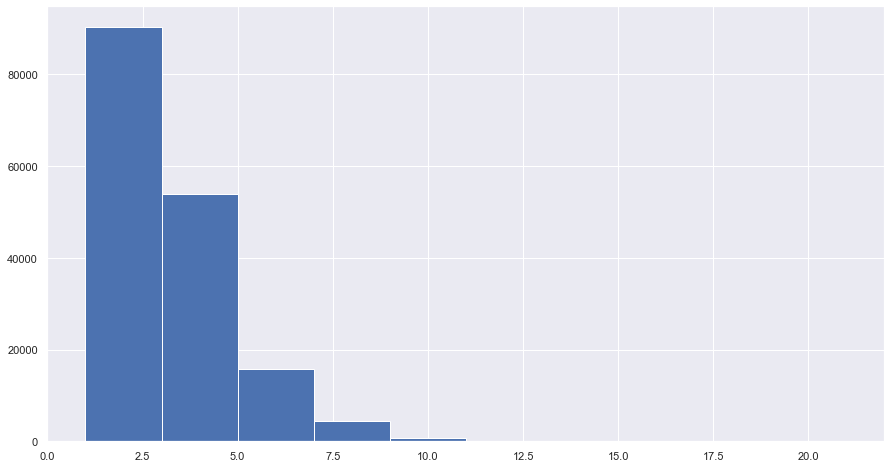

In [118]:
df.bathrooms.hist()

<AxesSubplot: >

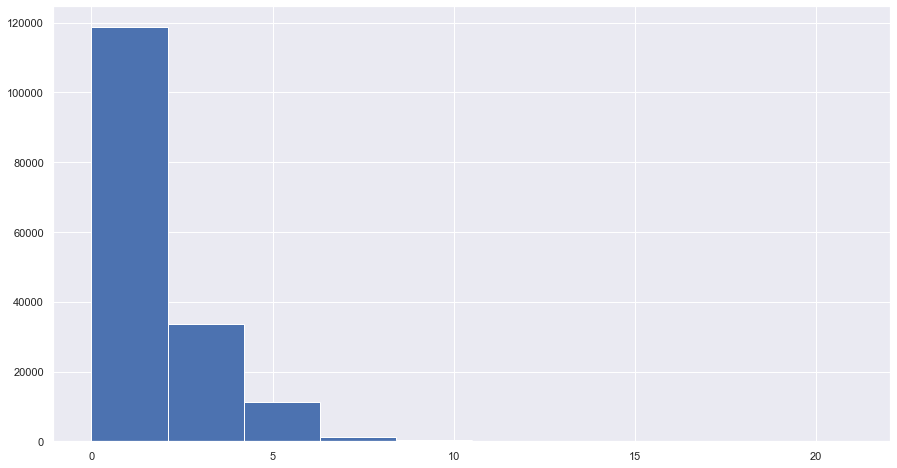

In [119]:
df.bedrooms.hist()

In [120]:
df.locations.value_counts()

Jumeirah Village Circle (JVC)    14229
Downtown Dubai                    9321
Bur Dubai                         9102
Dubai Marina                      8496
Business Bay                      7388
                                 ...  
Damac Lagoons                        5
Nad Shamma                           5
Deira Island                         3
The World Islands                    3
Palm Jebel Ali                       2
Name: locations, Length: 119, dtype: int64

In [121]:
df.property_types.value_counts()

Apartment               132073
Villa                    25871
Townhouse                 5157
Hotel Apartment           1459
Penthouse                  629
Residential Floor           43
Villa Compound              37
Residential Building        20
Name: property_types, dtype: int64

In [122]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'prices', 'locations',
       'property_types', 'property_keywords', 'description', 'amenities'],
      dtype='object')

In [123]:
corr_matrix = df[['bedrooms','bathrooms','area','prices']].corr()
corr_matrix

,bedrooms,bathrooms,area,prices
bedrooms,1.000000,0.928059,0.641848,0.242600
bathrooms,0.928059,1.000000,0.650500,0.247644
area,0.641848,0.650500,1.000000,0.221184
prices,0.242600,0.247644,0.221184,1.000000


<AxesSubplot: >

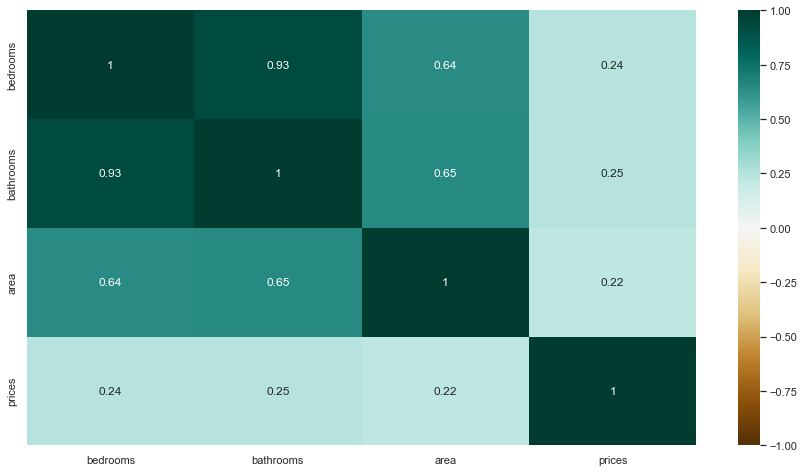

In [124]:
sns.heatmap(corr_matrix,vmin=-1, vmax=1, annot=True,cmap='BrBG')

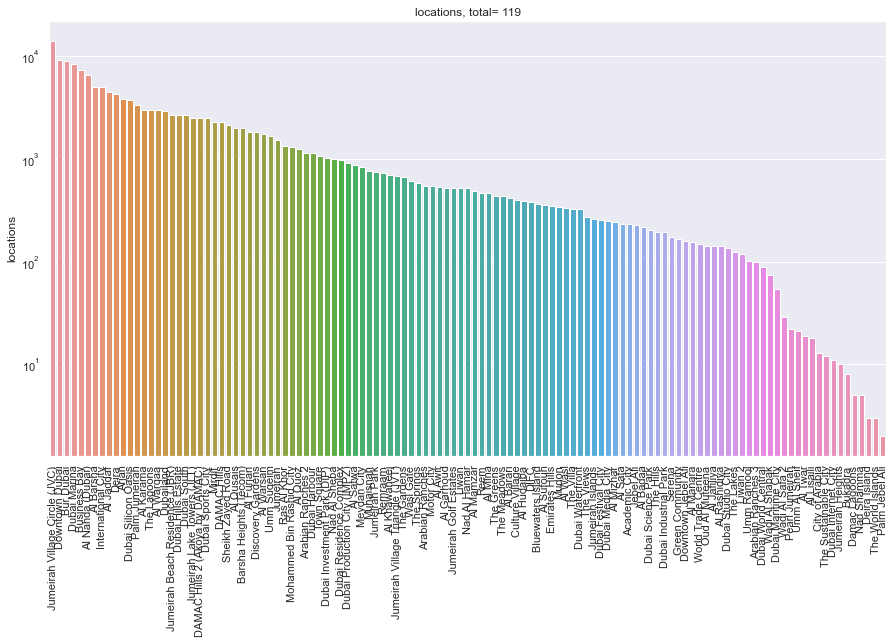

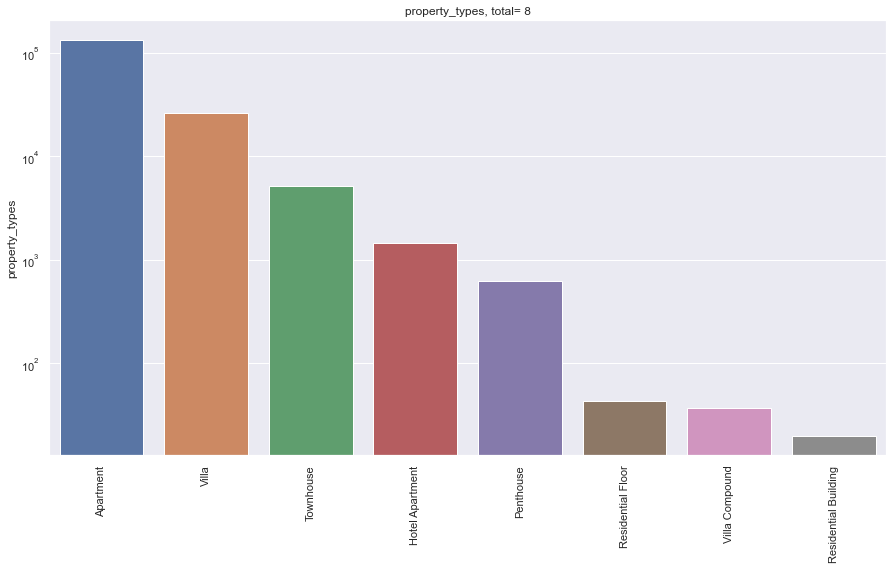

In [125]:
sns.set(rc = {'figure.figsize':(15,8)})
df_cat = df[['locations','property_types']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_yscale('log')
    chart.set(title=f"{i}, total= {len(cat_num)}")
    plt.show()

# Feature Engineering

### Pool

In [126]:
df['pool'] = df.apply(lambda x: 1 if 'pool' in x.description.lower() or 'pool' in x.amenities.lower() or 'pool' in x.property_keywords.lower() else 0  ,axis=1)

In [127]:
df.pool.value_counts()

1    126516
0     38773
Name: pool, dtype: int64

### Balcony

In [128]:
df['balcony'] = df.apply(lambda x: 1 
                         if 'balcony' in x.description.lower() or 'terrace' in x.description.lower()
                         or 'balcony' in x.amenities.lower()  or 'terrace' in x.amenities.lower()
                         or 'balcony' in x.property_keywords.lower() or 'terrace' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.balcony.value_counts()


1    127188
0     38101
Name: balcony, dtype: int64

### Furnished

In [129]:
df['furnished'] = df.apply(lambda x: 1 
                         if 'furnished' in x.description.lower() 
                         or 'furnished' in x.amenities.lower() 
                         or 'furnished' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.furnished.value_counts()


0    91741
1    73548
Name: furnished, dtype: int64

### Maid's room

In [130]:
df['maid'] = df.apply(lambda x: 1 
                         if 'maid' in x.description.lower() 
                         or 'maid' in x.amenities.lower() 
                         or 'maid' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.furnished.value_counts()


0    91741
1    73548
Name: furnished, dtype: int64

### Gym

In [131]:
df['gym'] = df.apply(lambda x: 1 
                         if 'gym' in x.description.lower() or 'fitness' in x.description.lower() or 'gymnasium' in x.description.lower() 
                         or 'gym' in x.amenities.lower() or 'fitness' in x.amenities.lower() or 'gymnasium' in x.amenities.lower() 
                         or 'gym' in x.property_keywords.lower() or 'fitness' in x.property_keywords.lower() or 'gymnasium' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.gym.value_counts()

1    124452
0     40837
Name: gym, dtype: int64

### Brand New

In [132]:
df['brand_new'] = df.apply(lambda x: 1 
                         if 'brand new' in x.description.lower()
                         or 'brand new' in x.amenities.lower() 
                         or 'brand new' in x.property_keywords.lower()
                         else 0  ,axis=1)
df.brand_new.value_counts()

0    123284
1     42005
Name: brand_new, dtype: int64

### Burj Khalifa View

In [133]:
df['burj_view'] = df.apply(lambda x: 1 
                         if ('burj khalifa' in x.description.lower() and 'view' in x.description.lower())
                         or ('burj khalifa' in x.amenities.lower()  and 'view' in x.amenities.lower())
                         or ('burj khalifa' in x.property_keywords.lower() and 'view' in x.property_keywords.lower())
                         else 0  ,axis=1)
df.burj_view.value_counts()

0    150287
1     15002
Name: burj_view, dtype: int64

### Sea View

In [134]:
df['sea_view'] = df.apply(lambda x: 1 
                         if 'sea view' in x.description.lower() 
                         or 'sea view' in x.amenities.lower()
                         or 'sea view' in x.property_keywords.lower()
                         else 0  ,axis=1)
df.sea_view.value_counts()

0    154105
1     11184
Name: sea_view, dtype: int64

### At beach or proximity to beach

In [135]:
df['beach'] = df.apply(lambda x: 1 
                         if 'beach'in x.description.lower()
                         or 'beach'  in x.amenities.lower() 
                         or 'beach'  in x.property_keywords.lower()
                         else 0  ,axis=1)
df.beach.value_counts()

0    148888
1     16401
Name: beach, dtype: int64

### Removing some outliers

In [136]:
print(f"So far, we have {len(df)} observations.")

So far, we have 165289 observations.


In [91]:
df['price_per_sqft'] = df['prices']/df['area']

In [92]:
df.price_per_sqft.describe()

count    165289.000000
mean         88.241793
std         444.868499
min           0.001125
25%          47.896710
50%          65.116279
75%         100.250627
max       59426.229508
Name: price_per_sqft, dtype: float64

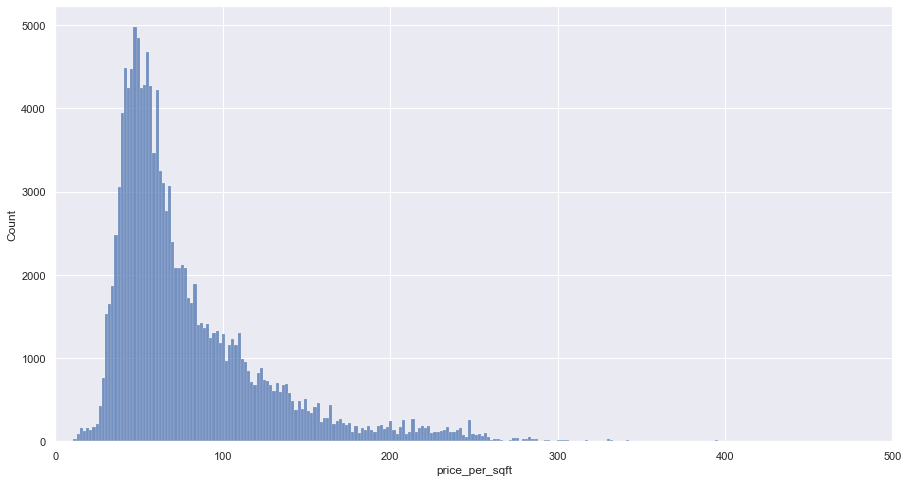

In [101]:
fig, ax = plt.subplots()
sns.histplot(df.price_per_sqft)
ax.set_xlim(0,500)
plt.show()

In [94]:
# Source: https://www.youtube.com/watch?v=cbqZa_1vzcg&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg&index=4&ab_channel=codebasics
def remove_price_persqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('locations'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [95]:
df = remove_price_persqft_outliers(df)
print(f"Now we have {len(df)} observations.")

Now we have 135987 observations.


In [99]:
df_final = df[['bedrooms', 'bathrooms', 'area', 'prices', 'locations',
               'property_types','pool', 'balcony', 'furnished', 'maid', 'gym', 'brand_new', 'burj_view',
               'sea_view', 'beach']]
df_final

,bedrooms,bathrooms,area,prices,locations,property_types,pool,balcony,furnished,maid,gym,brand_new,burj_view,sea_view,beach
0,0,1,410.0,21500.0,Academic City,Apartment,0,0,1,0,0,0,0,0,0
1,0,1,385.0,21500.0,Academic City,Apartment,0,0,0,0,0,0,0,0,0
2,0,1,410.0,21500.0,Academic City,Apartment,0,1,0,0,1,0,0,0,0
3,0,1,350.0,21500.0,Academic City,Apartment,1,1,0,1,1,0,0,0,0
4,0,1,385.0,21500.0,Academic City,Apartment,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135982,3,4,1806.0,152000.0,World Trade Centre,Apartment,0,1,1,0,0,0,0,0,0
135983,3,4,1806.0,152000.0,World Trade Centre,Apartment,1,1,1,0,1,0,0,0,0
135984,2,3,1829.0,175000.0,World Trade Centre,Apartment,0,1,1,1,0,0,0,0,0
135985,3,3,1806.0,152000.0,World Trade Centre,Hotel Apartment,0,1,1,0,0,0,0,0,0


In [100]:
df_final.to_csv('properties_cleaned_engineered.csv',index=False)